In [64]:
import scipy.io 
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import colorsys

In [65]:
def display_palette(colors):
    fig = plt.figure()
    gs = plt.GridSpec(1, len(colors))
    for i, color in enumerate(colors):
        # display color
        ax = fig.add_subplot(gs[0, i])
        ax.imshow(color)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0., hspace=0.)
    return fig

In [66]:
def convert_rgb_to_hsv(rgb_palette):
    hsv = np.zeros(rgb_palette.shape)
    for i in range(rgb_palette.shape[0]):
        hsv[i, :] = colorsys.rgb_to_hsv(rgb_palette[i, 0],
                                    rgb_palette[i, 1],
                                    rgb_palette[i, 2])
    return hsv

In [99]:
def process_data_mturk(filename):
    test = scipy.io.loadmat(filename)

    other = {}
    for key in test.keys():
        if key == "data":
            data = test[key]
        elif key[:2] == "__":
            continue
        else:
            other[key] = (test[key][:, 0])

    print(data.shape)

    df = pd.DataFrame.from_dict(other)

    # for i in range(data.shape[1]):
    #     col_prefix = "palette_" + str(i)
    #     rgb = ["R", "G", "B"]
    #     for j in range(3):
    #         colname = col_prefix + "_" + rgb[j]
    #         df[colname] = (data[:, i, j])
        
    for i in range(data.shape[1]):
        col_prefix = "palette_" + str(i)
        hsv = ["H", "S", "V"]
        converted = convert_rgb_to_hsv(data[:, i, :])
        for j in range(3):
            colnameHSV = col_prefix + "_" + hsv[j]
            df[colnameHSV] = (converted[:, j])

    # for i in range(3):
    #     rgb = ["R", "G", "B"]
    #     colname = "mean_color_" + rgb[i]
    #     df[colname] = np.mean(data[:, :, i])
    #     colname = "std_color_" + rgb[i]
    #     df[colname] = np.std(data[:, :, i])
    
    df.drop(["ids", "names", "targets"], inplace=True, axis=1)
    
    return df, data


df, data = process_data_mturk("..\colorCode\data\mturkData.mat")



display(df[:10])



(10743, 5, 3)


,userNormalizedTargets,palette_0_H,palette_0_S,palette_0_V,palette_1_H,palette_1_S,palette_1_V,palette_2_H,palette_2_S,palette_2_V,palette_3_H,palette_3_S,palette_3_V,palette_4_H,palette_4_S,palette_4_V
0,0.218844,0.500000,0.371429,0.549020,0.531746,0.365217,0.450980,0.551282,0.119816,0.850980,0.564394,0.230366,0.749020,0.969945,0.530435,0.450980
1,0.296755,0.369048,0.164706,1.000000,0.414313,0.867647,0.800000,0.456751,1.000000,0.619608,0.504762,1.000000,0.411765,0.544956,0.795812,0.749020
2,0.254885,0.109453,0.274590,0.956863,0.290123,0.238938,0.443137,0.178571,0.166667,0.329412,0.095628,0.648936,0.368627,0.067183,0.889655,0.568627
3,-0.355154,0.144195,0.436275,0.800000,0.161111,0.588235,1.000000,0.779070,0.337255,1.000000,0.900749,0.436275,0.800000,0.899160,0.777778,0.600000
4,-0.444863,0.202703,0.902439,0.643137,0.116766,0.847716,0.772549,0.000000,0.804124,0.380392,0.019444,0.818182,0.862745,0.080952,0.795455,0.862745
5,0.151287,0.000000,1.000000,0.949020,0.000000,1.000000,0.654902,0.000000,1.000000,0.509804,0.000000,1.000000,0.321569,0.000000,1.000000,0.129412
6,0.153466,0.970199,0.926380,0.639216,0.535782,1.000000,0.694118,0.910088,0.298039,1.000000,0.541667,0.200000,0.784314,0.570513,0.254902,0.400000
7,0.052842,0.134470,0.349206,0.988235,0.153986,0.589744,0.611765,0.098639,0.401639,0.478431,0.019685,0.803797,0.619608,0.987342,1.000000,0.309804
8,1.449884,0.577778,0.495868,0.949020,0.577851,0.700461,0.850980,0.577573,1.000000,0.850980,0.586288,1.000000,0.552941,0.577778,1.000000,0.352941
9,0.372261,0.784314,0.708333,0.188235,0.826087,0.718750,0.250980,0.902299,0.666667,0.341176,0.982906,0.639344,0.478431,0.015152,0.615385,0.560784


In [100]:
from sklearn.preprocessing import StandardScaler

def process_colorLovers(filename):
    test = scipy.io.loadmat(filename)

    other = {}
    for key in test.keys():
        if key == "data":
            data = test[key]
        elif key[:2] == "__":
            continue
        else:
            other[key] = (test[key][:, 0])

    print(data.shape)

    df = pd.DataFrame.from_dict(other)

    for i in range(data.shape[1]):
        col_prefix = "palette_" + str(i)
        rgb = ["R", "G", "B"]
        for j in range(3):
            colname = col_prefix + "_" + rgb[j]
            df[colname] = (data[:, i, j]/255)
        
    for i in range(data.shape[1]):
        col_prefix = "palette_" + str(i)
        hsv = ["H", "S", "V"]
        converted = convert_rgb_to_hsv(data[:, i, :])
        for j in range(3):
            colnameHSV = col_prefix + "_" + hsv[j]
            df[colnameHSV] = (converted[:, j])

    for i in range(3):
        rgb = ["R", "G", "B"]
        colname = "mean_color_" + rgb[i]
        df[colname] = np.mean(data[:, :, i]/255)
        colname = "std_color_" + rgb[i]
        df[colname] = np.std(data[:, :, i]/255)
    
    df = df.drop(["ids", "names", "views", "hearts"], axis=1)
    targets = df["targets"].to_numpy()
    targets = (targets - np.mean(targets))/np.std(targets)
    df["userNormalizedTargets"] = targets
    df = df.drop("targets", axis=1)
    
    return df, data

df2, data2 = process_colorLovers("..\colorCode\data\colorLoversData.mat")
display(df2[:10])

(383938, 5, 3)


,palette_0_R,palette_0_G,palette_0_B,palette_1_R,palette_1_G,palette_1_B,palette_2_R,palette_2_G,palette_2_B,palette_3_R,...,palette_4_H,palette_4_S,palette_4_V,mean_color_R,std_color_R,mean_color_G,std_color_G,mean_color_B,std_color_B,userNormalizedTargets
0,0.200000,0.200000,0.200000,0.752941,0.533333,0.149020,0.843137,0.831373,0.780392,0.286275,...,0.129630,0.217742,248.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,-0.197894
1,0.000000,0.000000,0.000000,0.623529,0.066667,0.105882,0.694118,0.086275,0.137255,0.160784,...,0.000000,0.000000,204.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,0.332378
2,0.266667,0.686275,0.411765,0.831373,0.262745,0.329412,1.000000,0.945098,0.376471,0.462745,...,0.021084,0.721739,230.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,-1.128532
3,0.000000,0.000000,0.000000,0.972549,0.972549,0.972549,0.960784,1.000000,0.752941,1.000000,...,0.148847,0.623529,255.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,-0.678026
4,0.149020,0.678431,0.894118,0.000000,0.400000,0.400000,0.584314,0.827451,0.905882,0.894118,...,0.000000,0.000000,255.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,-0.206669
5,0.670588,0.854902,0.301961,0.545098,0.827451,0.898039,0.505882,0.090196,0.533333,1.000000,...,0.500000,0.040909,220.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,0.064249
6,0.972549,0.925490,0.760784,0.984314,0.949020,0.874510,0.847059,0.737255,0.411765,0.066667,...,0.006173,0.987805,164.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,-0.376049
7,0.752941,0.533333,0.149020,0.792157,0.674510,0.580392,0.949020,0.949020,0.949020,0.631373,...,0.257752,0.436548,197.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,0.123995
8,0.000000,0.000000,0.000000,0.952941,0.925490,0.886275,0.976471,0.976471,0.976471,0.933333,...,0.666667,1.000000,3.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,-0.610290
9,0.835294,0.839216,0.796078,0.364706,0.360784,0.372549,0.741176,0.780392,0.725490,0.976471,...,0.666667,1.000000,1.0,0.577618,0.309169,0.499377,0.302861,0.427295,0.288801,0.718771


In [101]:
def concatenate_datasets(dataset1, dataset2):
    complete_dataset = pd.concat([dataset1, dataset2], axis=0)
    return complete_dataset

# completeData = concatenate_datasets(df, df2)
completeData = df.copy()
print(completeData.shape)

(10743, 16)


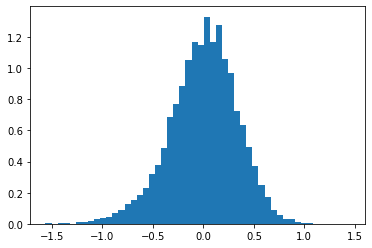

In [102]:
_ = plt.hist(completeData["userNormalizedTargets"], bins=50, density=True)

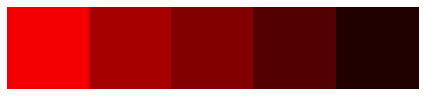

In [103]:
def make_color_array(colors):
    numColors, numComp = colors.shape
    allcolors = []
    for i in range(numColors):
        arr = np.ones((10, 10, numComp))
        arr[:, :, :] = colors[i, :]
        allcolors.append(arr)
    return allcolors

def display_from_df(palette_col):
    palette = make_color_array(palette_col)
    display_palette(palette)


display_from_df(data[5, :, :])

In [104]:
from sklearn.model_selection import train_test_split

color_rating_data = completeData.copy()
train_set, test_set = train_test_split(color_rating_data, test_size=0.2, random_state=42)
train_labels = train_set.pop("userNormalizedTargets")
test_labels = test_set.pop("userNormalizedTargets")
display(color_rating_data[:5])


,userNormalizedTargets,palette_0_H,palette_0_S,palette_0_V,palette_1_H,palette_1_S,palette_1_V,palette_2_H,palette_2_S,palette_2_V,palette_3_H,palette_3_S,palette_3_V,palette_4_H,palette_4_S,palette_4_V
0,0.218844,0.500000,0.371429,0.549020,0.531746,0.365217,0.450980,0.551282,0.119816,0.850980,0.564394,0.230366,0.749020,0.969945,0.530435,0.450980
1,0.296755,0.369048,0.164706,1.000000,0.414313,0.867647,0.800000,0.456751,1.000000,0.619608,0.504762,1.000000,0.411765,0.544956,0.795812,0.749020
2,0.254885,0.109453,0.274590,0.956863,0.290123,0.238938,0.443137,0.178571,0.166667,0.329412,0.095628,0.648936,0.368627,0.067183,0.889655,0.568627
3,-0.355154,0.144195,0.436275,0.800000,0.161111,0.588235,1.000000,0.779070,0.337255,1.000000,0.900749,0.436275,0.800000,0.899160,0.777778,0.600000
4,-0.444863,0.202703,0.902439,0.643137,0.116766,0.847716,0.772549,0.000000,0.804124,0.380392,0.019444,0.818182,0.862745,0.080952,0.795455,0.862745


In [105]:
from sklearn.tree import DecisionTreeRegressor
import joblib


In [106]:
score_regressor = joblib.load(r"..\regressor\scoring_regressor_mturk.pkl")

def scoring_metric(feature_vec):
    score = score_regressor.predict(feature_vec)
    return score

Treinar decision tree

In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"splitter":["best"], "max_depth":[2, 3, 4, 5]}]

decision_tree = DecisionTreeRegressor()
                        
grid_search = GridSearchCV(decision_tree, param_grid, cv=10,
                           scoring="neg_mean_squared_error",
                           return_train_score=True,
                           verbose=1)

grid_search.fit(train_set, train_labels)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [2, 3, 4, 5], 'splitter': ['best']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [133]:
grid_search.best_params_

{'max_depth': 5, 'splitter': 'best'}

In [134]:
gs_results = grid_search.cv_results_
train_labels_std = np.std(train_labels)
print("RMSE")
for mean_score, params in zip(gs_results["mean_test_score"], gs_results["params"]):
    print(np.sqrt(-mean_score), params)

RMSE
0.30679722082001226 {'max_depth': 2, 'splitter': 'best'}
0.29663952434015295 {'max_depth': 3, 'splitter': 'best'}
0.2887850901602531 {'max_depth': 4, 'splitter': 'best'}
0.28320616950017413 {'max_depth': 5, 'splitter': 'best'}


In [135]:
best_model = grid_search.best_estimator_


In [136]:
from sklearn.metrics import mean_squared_error
predictions = best_model.predict(test_set)
results_mse = mean_squared_error(test_labels, predictions)
results_rmse = np.sqrt(results_mse)
print("RMSE = ", results_rmse)

RMSE =  0.28735646078983346


In [137]:
import joblib

joblib.dump(best_model, "scoring_regressor_mturk.pkl")

['scoring_regressor_mturk.pkl']

In [138]:
from sklearn.tree import export_graphviz, plot_tree

export_graphviz(
    best_model,
    out_file="myDecisionTree.dot",
    feature_names=train_set.columns,
    class_names=train_labels,
    rounded=True,
    filled=True
)

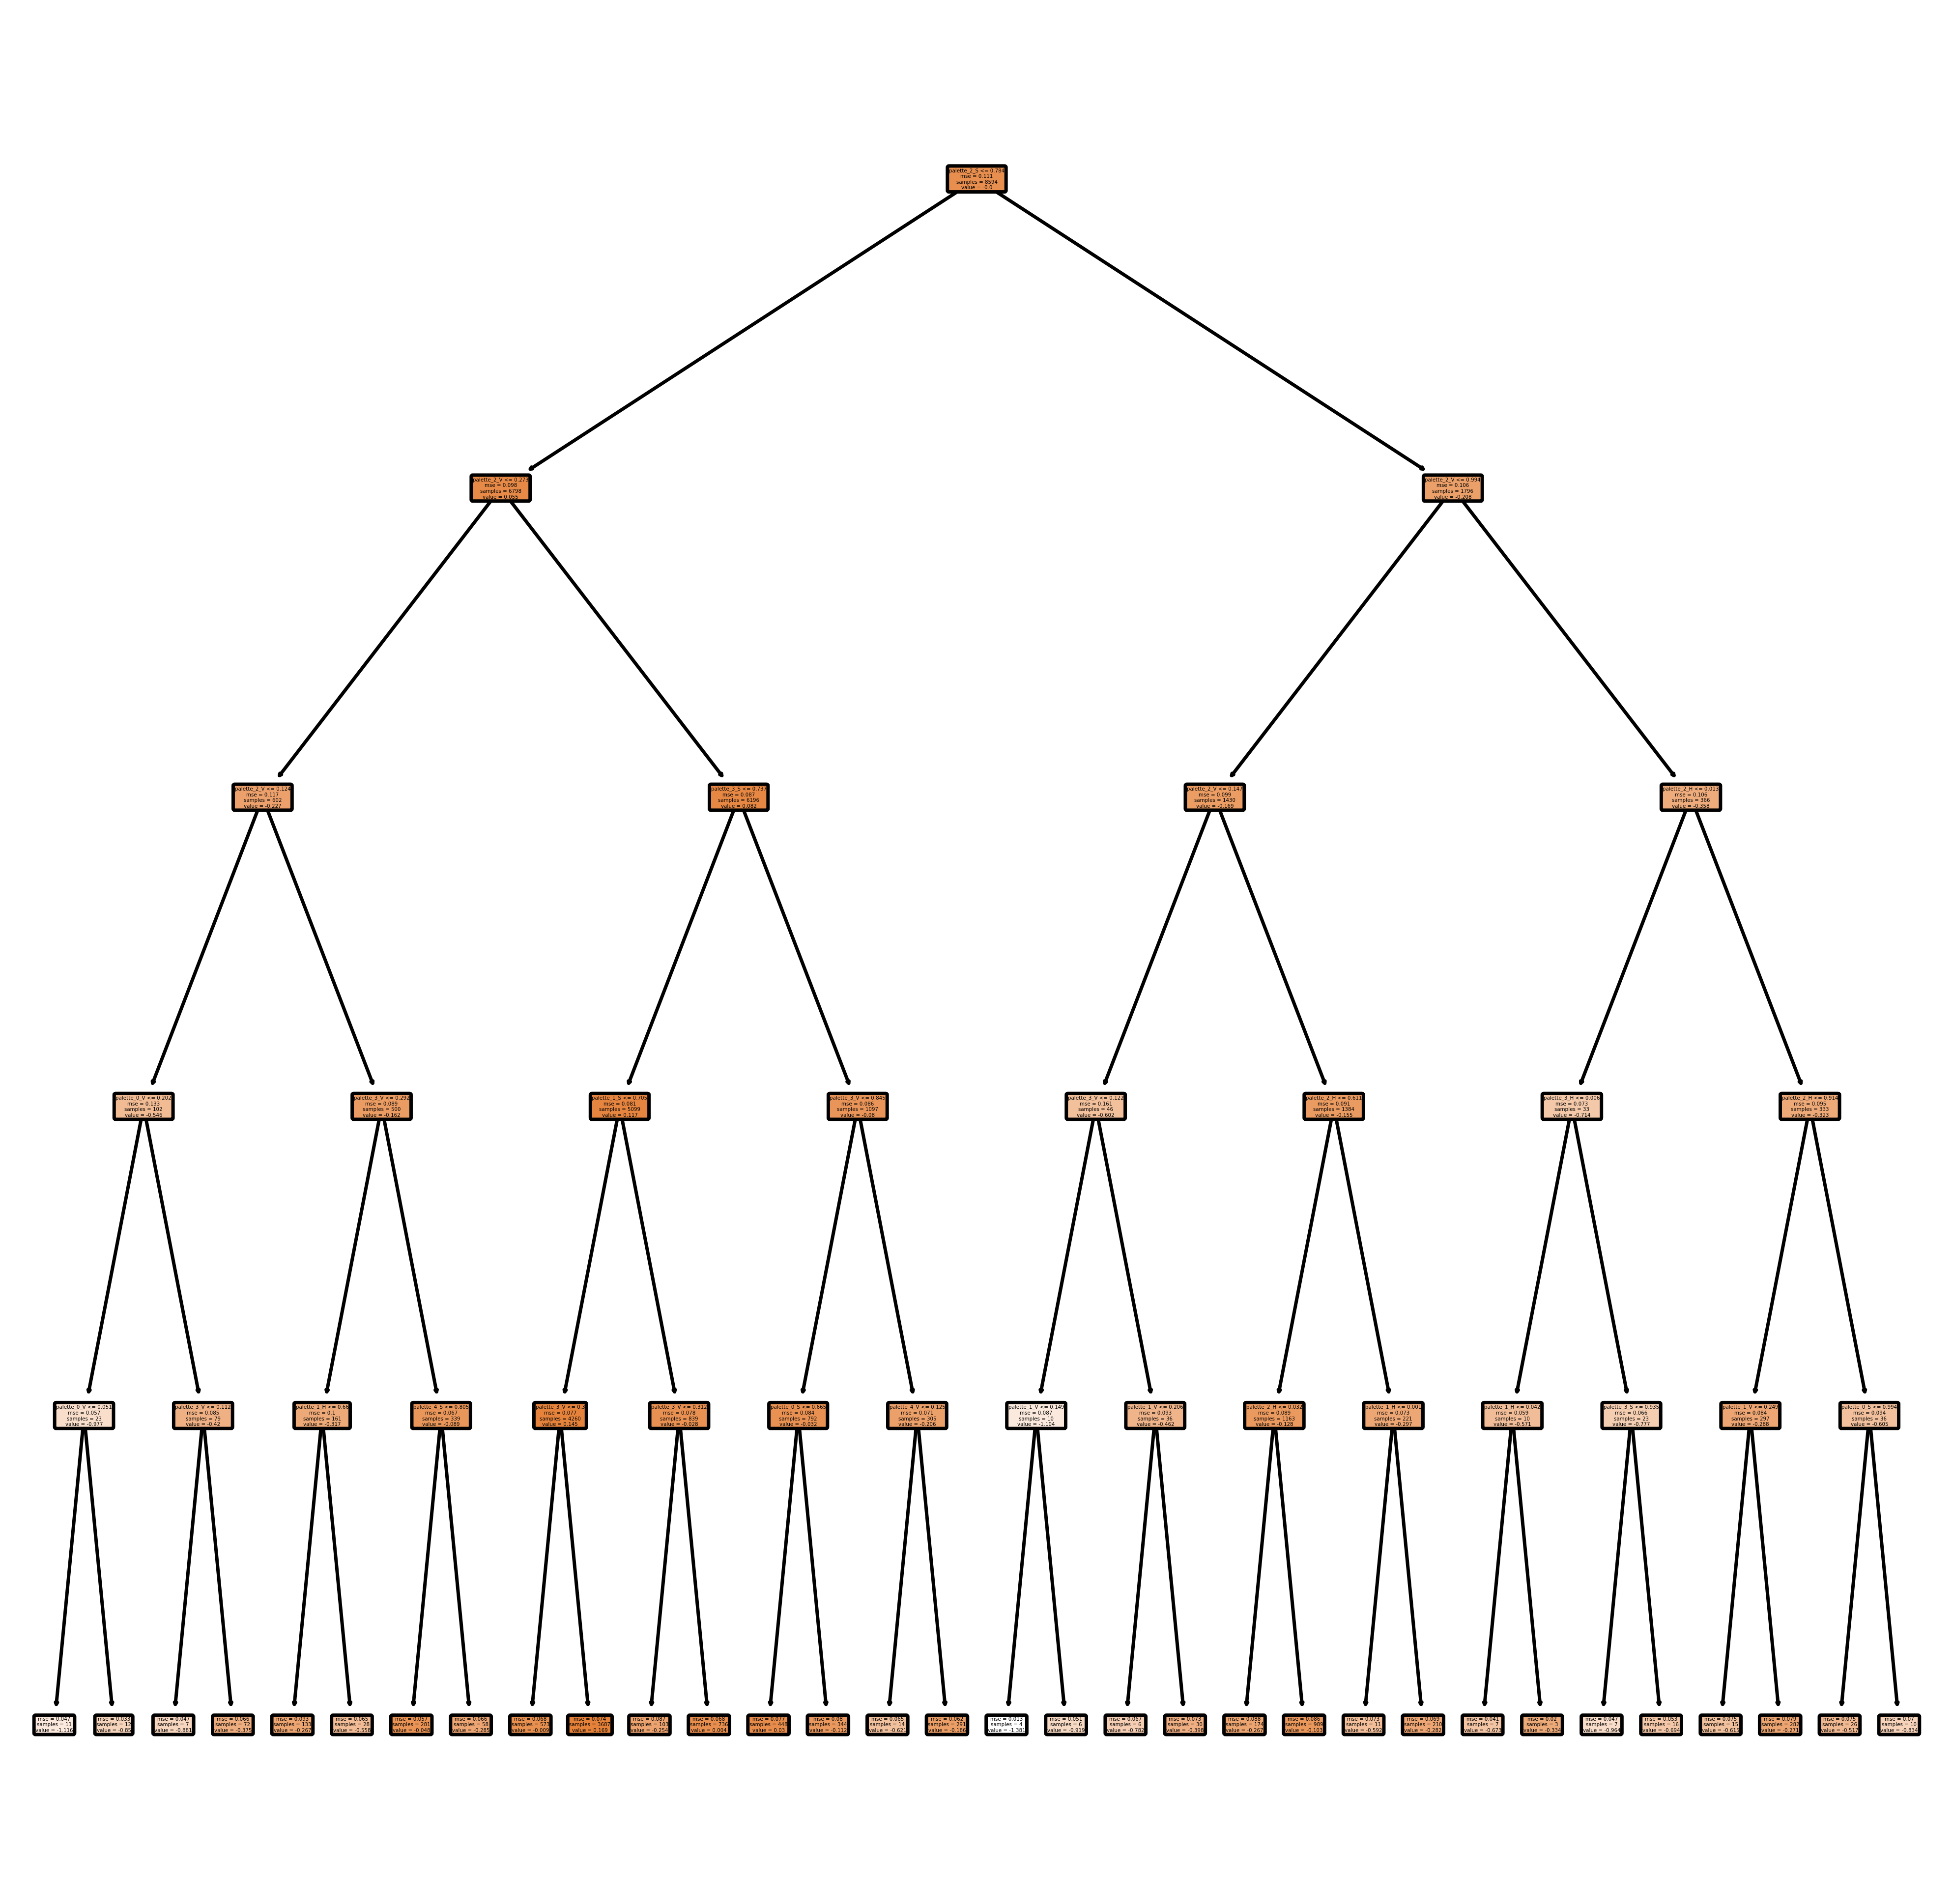

In [139]:
figure = plt.figure(figsize=(10, 10), dpi=500)
ax = figure.add_subplot()
treeplot = plot_tree(
    best_model,
    feature_names=train_set.columns,
    class_names=train_labels,
    rounded=True,
    filled=True,
    ax=ax,
    max_depth=5
    )
